# Seasonal Arima (SARIMA)

## Importing Necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Importing and Processing Data

In [220]:
df = pd.read_csv('old_working.csv')
df

,Time,Price
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526
...,...,...
85,2021-06-20,0.1683
86,2021-06-21,0.1688
87,2021-06-22,0.1693
88,2021-06-23,0.1689


In [225]:
df.describe()

,Time,Price
count,90,90.000000
mean,2021-05-10 12:00:00,0.155623
min,2021-03-27 00:00:00,0.142500
25%,2021-04-18 06:00:00,0.151200
50%,2021-05-10 12:00:00,0.154000
75%,2021-06-01 18:00:00,0.162325
max,2021-06-24 00:00:00,0.169300
std,NaN,0.007094


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    90 non-null     datetime64[ns]
 1   Price   90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [227]:
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    90 non-null     datetime64[ns]
 1   Price   90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [228]:
df.head()

,Time,Price
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526


In [229]:
df.set_index('Time', inplace=True)

In [230]:
df.head()

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526


## Visualising Data

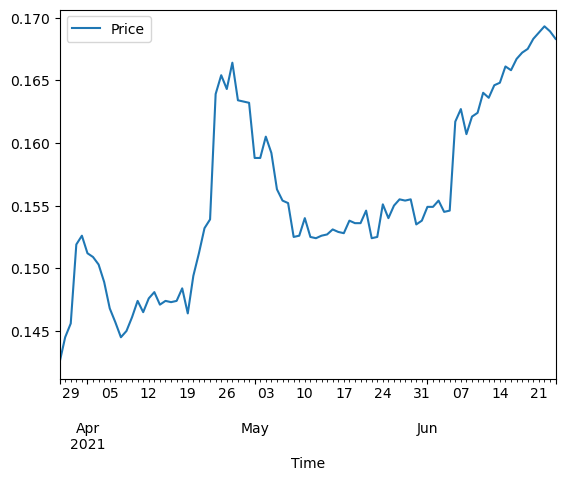

In [231]:
df.plot()
plt.show()

## Checking Stationarity

In [232]:
from pmdarima.arima import ADFTest

In [233]:
adf_test = ADFTest(alpha=0.05)
print(adf_test)
adf_test.should_diff(df)

ADFTest()


(0.34508068314245954, True)

## Train and Test Split

In [234]:
n = int(len(df) * 0.8)

In [235]:
train = df.Price[:n]
test = df.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-03-27    0.1425
2021-03-28    0.1445
2021-03-29    0.1456
2021-03-30    0.1519
2021-03-31    0.1526
               ...  
2021-06-02    0.1549
2021-06-03    0.1554
2021-06-04    0.1545
2021-06-05    0.1546
2021-06-06    0.1617
Name: Price, Length: 72, dtype: float64

For Testing
Time
2021-06-07    0.1627
2021-06-08    0.1607
2021-06-09    0.1621
2021-06-10    0.1624
2021-06-11    0.1640
2021-06-12    0.1636
2021-06-13    0.1646
2021-06-14    0.1648
2021-06-15    0.1661
2021-06-16    0.1658
2021-06-17    0.1667
2021-06-18    0.1672
2021-06-19    0.1675
2021-06-20    0.1683
2021-06-21    0.1688
2021-06-22    0.1693
2021-06-23    0.1689
2021-06-24    0.1683
Name: Price, dtype: float64


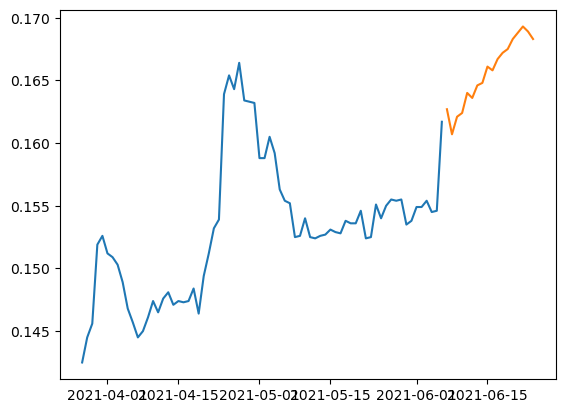

In [236]:
plt.plot(train)
plt.plot(test)
plt.show()

## Arima Model

In [237]:
arima_model=auto_arima (train, start_p=3, d=1, start_q=3, max_p=3,
                        max_d=1, max_q=3, start_P=0, D=1, start_Q=0,
                        max_P=5, max_D=5, max_Q=5, m=4, seasonal=True,
                        error_action='warn', trace = True, 
                        supress_warnings=True, stepwise = True, 
                        random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,1,0)[4]             : AIC=-598.647, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-590.716, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-599.302, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-610.500, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-588.520, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-604.304, Time=0.08 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-599.999, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=-609.123, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=-613.489, Time=0.30 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=-607.568, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-601.436, Time=0.02 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=-612.213, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=-

In [239]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   72
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 4)   Log Likelihood                 308.745
Date:                             Wed, 29 Nov 2023   AIC                           -613.489
Time:                                     18:08:17   BIC                           -609.080
Sample:                                 03-27-2021   HQIC                          -611.744
                                      - 06-06-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L4       -0.7042      0.076     -9.299      0.000      -0.853      -0.556
sigma2      5.566e-06    5.9e-07      9.438      0.000    4.41e-06    6.72e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                42.39
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.64
Prob(H) (two-sided):                  0.76   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

In [240]:
prediction = pd.DataFrame(arima_model.predict(n_periods=18), 
                          index=test.index)
prediction_columns = ['predicted_price']
prediction

,0
Time,
2021-06-07,0.161530
2021-06-08,0.161412
2021-06-09,0.161824
2021-06-10,0.163814
2021-06-11,0.163643
2021-06-12,0.163525
2021-06-13,0.163937
2021-06-14,0.165927
2021-06-15,0.165757


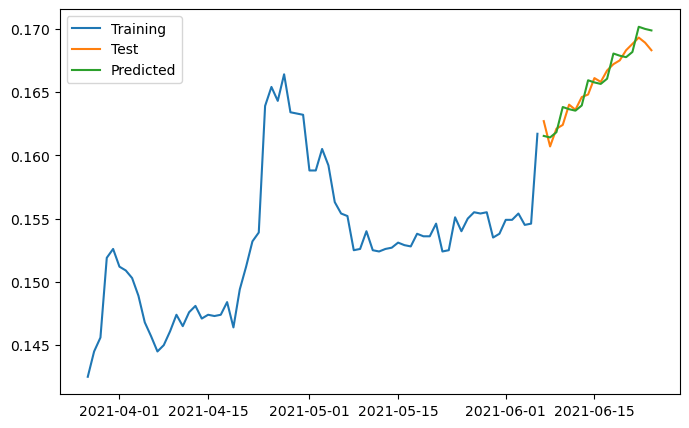

In [249]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(test, label='Test')
plt.plot(prediction, label="Predicted")
plt.legend(loc="upper left")
plt.savefig("m4_2xlarge_ap_se_test_vs_predicted.png")
plt.show()

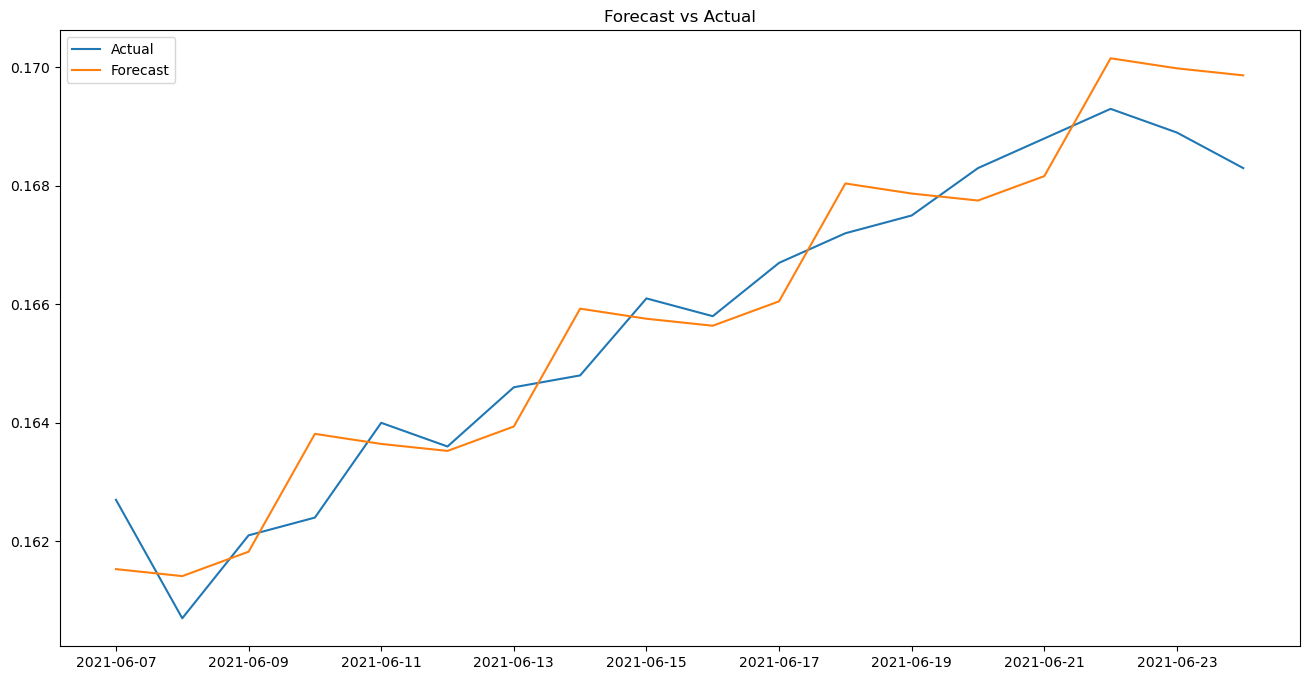

In [250]:
step = 18

# fc = pd.Series(fc, index=test[:step].index)
# print(fc)
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="Actual")

plt.plot(prediction, label="Forecast")

plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.savefig("m4_2xlarge_ap_se_test_vs_predicted_zoomed.png")
plt.show()

## R2 Score

In [243]:
test_df = pd.DataFrame(test)
test_df
# test['predicted_prices'] = prediction

,Price
Time,
2021-06-07,0.1627
2021-06-08,0.1607
2021-06-09,0.1621
2021-06-10,0.1624
2021-06-11,0.1640
2021-06-12,0.1636
2021-06-13,0.1646
2021-06-14,0.1648
2021-06-15,0.1661


In [244]:
test_df['predicted_prices'] = prediction
test_df = test_df.dropna()
test_df

,Price,predicted_prices
Time,,
2021-06-07,0.1627,0.161530
2021-06-08,0.1607,0.161412
2021-06-09,0.1621,0.161824
2021-06-10,0.1624,0.163814
2021-06-11,0.1640,0.163643
2021-06-12,0.1636,0.163525
2021-06-13,0.1646,0.163937
2021-06-14,0.1648,0.165927
2021-06-15,0.1661,0.165757


In [245]:
r2_score(test_df['Price'], test_df['predicted_prices'])

0.8979250634046473

In [246]:
np.sqrt(mean_squared_error(test_df['Price'], test_df['predicted_prices']))

0.0008253516102654094

In [247]:
test_df.predicted_prices.describe()

count    18.000000
mean      0.165827
std       0.002894
min       0.161412
25%       0.163686
50%       0.165842
75%       0.167998
max       0.170154
Name: predicted_prices, dtype: float64

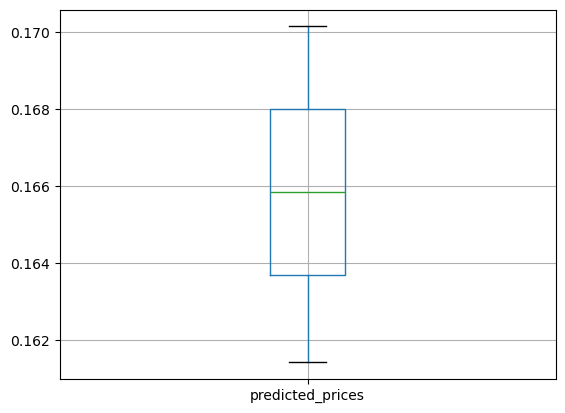

In [248]:
test_df.boxplot(column=['predicted_prices'])
plt.show()

In [29]:
test_df['predicted_prices'].describe().to_csv("Prediction_Description_SARIMA_011.csv")

In [32]:
test_df.to_csv("results_SARIMA_010_011.csv")